In [164]:
class AlexRipOff:
    
    def __init__(self,number_of_classes,image_height,image_width,train_dataset_path,valid_dataset_path,model_path,epochs,data_loader_batch_size):
    
        self.mood                   = "Have fun"
        self.number_of_classes      = number_of_classes
        self.image_height           = image_height
        self.image_width            = image_width
        self.train_dataset_path     = train_dataset_path
        self.valid_dataset_path     = valid_dataset_path
        self.model_path             = model_path
        self.epochs                 = epochs
        self.data_loader_batch_size = data_loader_batch_size
        self.model                  = Sequential()

   
    def add_conv_layer(self, outputs, kernel_size, strides, padding, activation, kernel_initializer,*input_shape):
     
        try:
   
            self.model.add(
                       Conv2D(filters     = outputs, 
                       kernel_size        = kernel_size,
                       strides            = strides,
                       padding            = padding,
                       activation         = activation,
                       input_shape        = input_shape[0],
                       kernel_initializer = kernel_initializer))
        except:
            
            
            self.model.add(
                       Conv2D(filters            = outputs, 
                       kernel_size        = kernel_size,
                       strides            = strides,
                       padding            = padding,
                       activation         = activation,
                       kernel_initializer = kernel_initializer))
    
    def add_max_pooling_layer(self, pool_size, strides, padding ,data_format):
    
        return self.model.add(
                    MaxPooling2D(pool_size   = pool_size,
                                 strides     = strides,
                                 padding     = padding, 
                                 data_format = None))

    def add_dense_layer(self, units, activation):
        
        return self.model.add(
                    Dense(units      = units , 
                          activation = activation ))
    
    def add_flatten_layer(self):
        
        return self.model.add(Flatten())
    
    def compile_model(self, optimizer, loss, metrics):
        
        return self.model.compile(optimizer= optimizer,
                            loss= loss,
                            metrics = metrics)
    
    def construct_model(self):
        
        self.add_conv_layer(96, (11,11), 4, 'valid', 'relu','he_normal', (self.image_height, self.image_width, 3) )

        self.add_max_pooling_layer( (3,3), (2,2), 'valid' ,None)
        
        self.add_conv_layer(256, (5,5), 1, 'same', 'relu','he_normal')
        
        self.add_max_pooling_layer( (3,3), (2,2), 'valid' ,None)
        
        self.add_conv_layer(384, (3,3), 1, 'same', 'relu','he_normal')
        
        self.add_conv_layer(384, (3,3), 1, 'same', 'relu','he_normal')
        
        self.add_conv_layer(256, (3,3), 1, 'same', 'relu','he_normal')
        
        self.add_max_pooling_layer( (3,3), (2,2), 'valid' ,None)
        
        self.add_flatten_layer()
        
        self.add_dense_layer(4096, 'relu')
        
        self.add_dense_layer(4096, 'relu')
        
        self.add_dense_layer(1000, 'relu')
        
        self.add_dense_layer(self.number_of_classes, 'softmax')

        self.compile_model(tf.keras.optimizers.Adam(0.001), 'categorical_crossentropy', ['accuracy'])
        
    
    def image_loaders(self,type_of_data):
        
        if type_of_data == "train":
        
            data_generator = ImageDataGenerator(rescale            = 1./255,
                                                rotation_range     = 10,
                                                width_shift_range  = 0.1,
                                                height_shift_range = 0.1,
                                                shear_range        = 0.1,
                                                zoom_range         = 0.1)

            data_loader = data_generator.flow_from_directory(self.train_dataset_path,
                                                    target_size = (self.image_height, self.image_width),
                                                    color_mode  = "rgb",
                                                    batch_size  = self.data_loader_batch_size,
                                                    seed        = 1,
                                                    shuffle     = True,
                                                    class_mode  = "categorical")
            return data_loader
        
        elif type_of_data == "validation":
        
            data_generator = ImageDataGenerator(rescale = 1./255)

            data_loader = data_generator.flow_from_directory(self.valid_dataset_path,
                                                    target_size = (self.image_height, self.image_width),
                                                    color_mode  = "rgb",
                                                    batch_size  = self.data_loader_batch_size,
                                                    seed        = 1,
                                                    shuffle     = True,
                                                    class_mode  = "categorical")
            return data_loader
        
        
    def train_model(self):
        
        train_loader = self.image_loaders("train")
        train_number = train_loader.samples
    
        valid_loader = self.image_loaders("validation")
        valid_number = valid_loader.samples


        
    
        model_report = self.model.fit(train_loader,
                                      epochs           = self.epochs,
#                                       steps_per_epoch  = train_number,
                                      validation_data  = valid_loader,
#                                       validation_steps = valid_number,
#                                       callbacks=callback_list,
                                      verbose          = 2)
        print(self.model.summary())
        
        self.plot_accuracy(model_report)
        self.plot_loss(model_report)

        
    def plot_accuracy(self,hist):
        
        plt.plot(hist.history["accuracy"])
        plt.plot(hist.history["val_accuracy"])
        plt.title("Model accuracy")
        plt.ylabel("accuracy")
        plt.xlabel("epoch")
        plt.legend(["train", "validation"], loc="upper left")
        plt.show()
 
    def plot_loss(self,hist):
        
        plt.plot(hist.history["loss"])
        plt.plot(hist.history["val_loss"])
        plt.title("Model loss")
        plt.ylabel("loss")
        plt.xlabel("epoch")
        plt.legend(["train", "validation"], loc="upper left")
        plt.show()
        
    def random_image_check(self):
        
        class_names = os.listdir('small_folder')


        valid_loader = self.image_loaders("validation")

        x_valid, label_batch  = next(iter(valid_loader))

        prediction_values = self.model.predict_classes(x_valid)
        
        fig = plt.figure(figsize=(10, 6))
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
        for i in range(8):
            ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
            ax.imshow(x_valid[i,:],cmap=plt.cm.gray_r, interpolation='nearest')

            if prediction_values[i] == np.argmax(label_batch[i]):
                ax.text(3, 17, class_names[prediction_values[i]], color='blue', fontsize=14)
            else:
                ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)


        

Found 5470 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Epoch 1/2


2022-12-05 20:37:17.123828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-12-05 20:37:59.145752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


171/171 - 44s - loss: 2.7318 - accuracy: 0.2106 - val_loss: 1.6120 - val_accuracy: 0.2067
Epoch 2/2
171/171 - 43s - loss: 1.6043 - accuracy: 0.2154 - val_loss: 1.6098 - val_accuracy: 0.2067
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_150 (Conv2D)          (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 13, 13, 384)       885120    
_____________________________________________________________

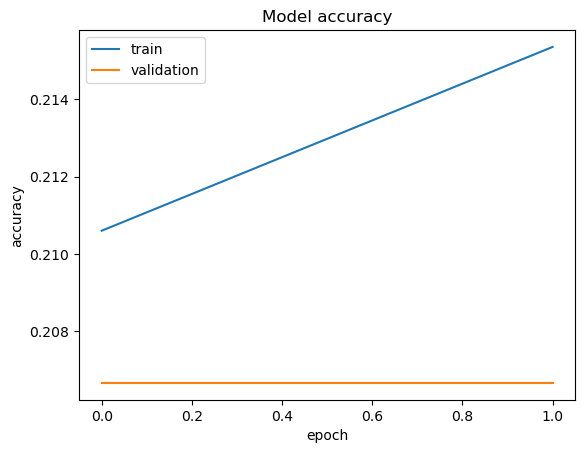

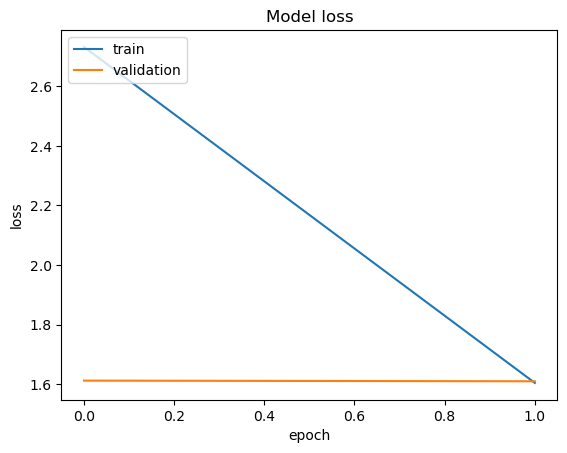

Found 600 images belonging to 5 classes.


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2022-12-05 20:38:44.422521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Model is Run


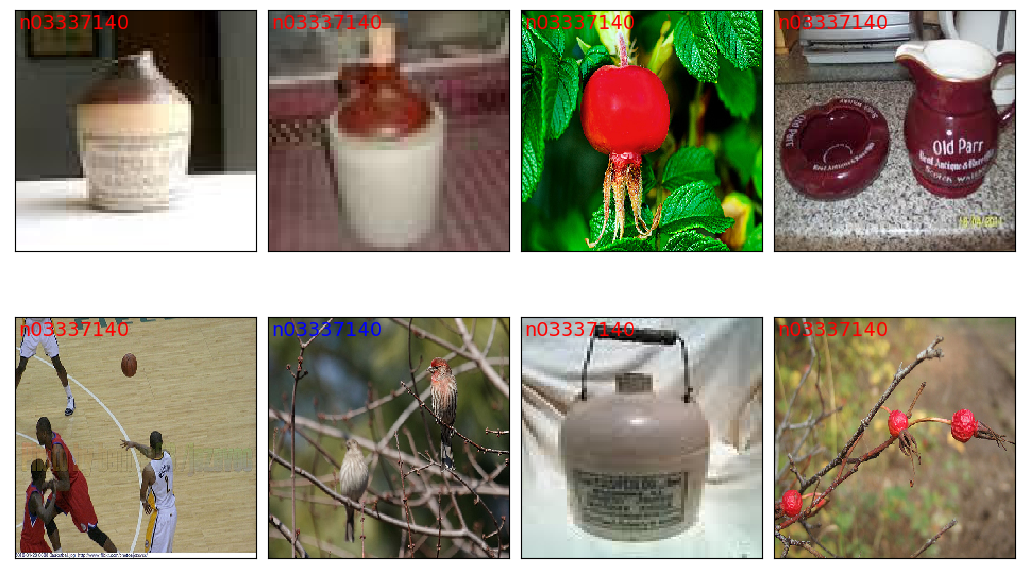

In [165]:
if __name__ == "__main__": 
    
    import datetime
    import numpy as np
    import os
    import tensorflow as tf
    import matplotlib.pyplot as plt
    
    from tensorflow.keras import Model
    from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
    from tensorflow.keras.losses import categorical_crossentropy
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from tensorflow.keras.utils import to_categorical

    
    epochs                 = 20
    data_loader_batch_size = 32
    image_height           = 227
    image_width            = 227
    train_dataset_path     = "small_folder"
    valid_dataset_path     = "test"
    model_path             = "./alex_rip_off.h5"
    number_of_classes      = 5 
    
    
    alex_rip_off_model = AlexRipOff(number_of_classes,image_height,image_width,train_dataset_path,valid_dataset_path,model_path,epochs,data_loader_batch_size)
    
    alex_rip_off_model.construct_model()
    
    alex_rip_off_model.train_model()
    
    alex_rip_off_model.random_image_check()
        
    print("Model is Run")




In [162]:
import os



dir_list = os.listdir('small_folder')

print(dir_list)



['n03337140', 'n02802426', 'n01532829', 'n12620546', 'n04579145']
